# Estudo de caso sobre as 15 maiores economias do Mundo nos últimos 10 (2010 - 2019) anos e onde o Brasil se situa.

Neste estudo de caso será analisada alguns indicadores dos últimos 10 anos das 15 maiores economias do mundo. Para fazer isso, será utilizado 3 dataset. 

O primeiro dataset,  para analisar os Indicadores de Energia,  Energy Indicators.xls, é uma lista de indicadores de fornecimento de energia e produção de eletricidade renovável das Nações Unidas do ano de 2013 com a última atualização sendo de 2017. 
https://datacatalog.worldbank.org/dataset/mena-energy-indicators-2017

O segundo dataset são dados do PIB dos países entre 1960 a 2019 (última atualização) fornecidas pelo Banco mundial.
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

Por último, os dados de Engenharia e Energia e Tecnologia de Energia disponibilizados Sciamgo Journal & Country Rank que é disponibilizado para o público e inclui os periódicos e indicadores científicos de países desenvolvidos a partir das informações contidas na base de dados Scopus e que mede o impacto e a influência das publicações científicas, com última atualização sendo disponibilizada em 2019.
https://www.scimagojr.com/countryrank.php?category=2102

In [1]:
#Importando as bibliotecas que serão utilizados nesse trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parte 1 - Limpando os Dados

A primeira parte desse trabalho, o foco será fazer uma limpeza dos Dados para que se possa ter uma visualização correta dos dados. 

In [2]:
pd.set_option('display.max_columns', None)
def data_cleaning():
    #Carregando e limpando os dados de Indicadores de Energia
    Energy = pd.read_excel('assets/Energy Indicators.xls', index_col=None, header=None, footer=None)
    Energy = Energy.drop([0, 1], axis=1)
    Energy = Energy[18:245]
    Energy = Energy.rename(columns ={2:'Country',
                                     3:'Energy Supply',
                                     4: 'Energy Supply per Capita',
                                     5:'% Renewable'})
    Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: np.NaN if x =='...' else x * 10**6)
    Energy['Energy Supply per Capita'] = Energy['Energy Supply per Capita'].replace('...',np.NaN).apply(pd.to_numeric) 
    Energy['Country'] = Energy['Country'].str.replace(r'\(.*\)', '')
    Energy['Country'] = Energy['Country'].str.replace('\d+', '')
    Energy['Country'] = Energy['Country'].str.strip()
    Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
                                                   "United States of America": "United States",
                                                   "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                                   "China, Hong Kong Special Administrative Region": "Hong Kong"})
    
    #Carregando e limpandos os dados do PIB disponibilizados pelo World Bank
    GDP = pd.read_csv('assets/world_bank2.csv', skiprows=4, usecols=[0] + list(range(54,64)))
    GDP = GDP.rename(columns = {'Country Name': 'Country'})
    GDP['Country'] = GDP['Country'].replace(to_replace=["Korea, Rep.", "Iran, Islamic Rep.", "Hong Kong SAR, China"],
                                                     value=["South Korea", "Iran", "Hong Kong"])
    
    #Carregando os dados do Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology
    ScimEn = pd.read_excel('assets/scimagojr.xlsx')
    ScimEn = ScimEn[ScimEn['Rank']<=15]
    
    #Imergindos os 3 arqivos de acordo com o rank dos 15 melhores colocado no rank diponiblizados pelo ScimEn
    df = pd.merge(ScimEn, Energy, how='inner', left_on='Country', right_on='Country')
    df2 = pd.merge(df, GDP, how='inner', left_on='Country', right_on='Country')
    df2 = df2.set_index('Country')
    
    
    return df2

#Visualizando os dados 
data_cleaning()

,Rank,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
China,1,Asiatic Region,235126,233883,1909601,1306438,8.12,224,1.271910e+11,93.0,19.7549,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.434290e+13
United States,2,Northern America,157811,154288,1940563,639345,12.30,333,9.083800e+10,286.0,11.571,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.822470e+13,1.871496e+13,1.951935e+13,2.058016e+13,2.143323e+13
Japan,3,Asiatic Region,46032,45559,436961,109968,9.49,181,1.898400e+10,149.0,10.2328,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.922538e+12,4.866864e+12,4.954807e+12,5.081770e+12
India,4,Asiatic Region,39893,38848,368175,123446,9.23,171,3.319500e+10,26.0,14.9691,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.652755e+12,2.713165e+12,2.868929e+12
United Kingdom,5,Western Europe,38873,37780,536378,100038,13.80,208,7.920000e+09,124.0,10.6005,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12,2.694283e+12,2.666229e+12,2.860668e+12,2.829108e+12
Germany,6,Western Europe,32935,32227,367356,78265,11.15,186,1.326100e+10,165.0,17.9015,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.356236e+12,3.467498e+12,3.682602e+12,3.963768e+12,3.861124e+12
Russian Federation,7,Eastern Europe,31880,31664,91906,42529,2.88,84,3.070900e+10,214.0,17.2887,1.524917e+12,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,1.363481e+12,1.276787e+12,1.574199e+12,1.669583e+12,1.699877e+12
Canada,8,Northern America,29633,29011,491467,88987,16.59,210,1.043100e+10,296.0,61.9454,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12,1.528243e+12,1.649878e+12,1.716263e+12,1.736426e+12
Italy,9,Western Europe,23725,22819,312631,76446,13.18,155,6.530000e+09,109.0,33.6672,2.134018e+12,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12,1.875797e+12,1.961796e+12,2.091545e+12,2.003576e+12


# 2. Analizando os dados

Agora que foi feito uma limpeza e junção nos dados podemos fazer inferências. 

### 1- Quais São os 15 primeiros países para o PIB médio nos últimos 10 anos?

Text(0.5, 0, 'Top 15 países')

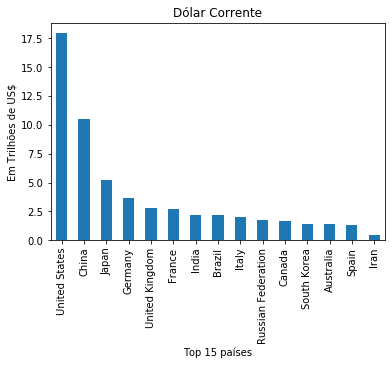

In [3]:
Top = data_cleaning()
top = Top[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']] / 10**12
avgGDP = top.mean(axis=1).sort_values(ascending=False)
avgGDP = avgGDP 
avgGDP.rename('avgGDP')
ax = avgGDP.plot.bar(title='Dólar Corrente')
ax.set_ylabel('Em Trilhões de US$')
ax.set_xlabel('Top 15 países')

Como pode ser visto no gráfico, no PIB médio dos últimos 10 anos há uma soberania dos ainda dos EUA em relação aos outros países com a China e Japão logo atrás do top 3. O Brasil se encontra como a 8ª melhor média do PIB entre os 15 maiores. 

### 2 - Em quanto o PIB  Médio variou ao longo do período de 10 anos para o Brasil?

In [4]:
top = top.T
change = data_cleaning()
change = change[change['Rank'] == 15]
change = (change['2019'] - change['2010']) / 10**9
print('O PIB teve uma variação de {} bilhões de dolares nos últimos 10 anos'.format(np.round(change[0], 0)))

O PIB teve uma variação de -369.0 bilhões de dolares nos últimos 10 anos


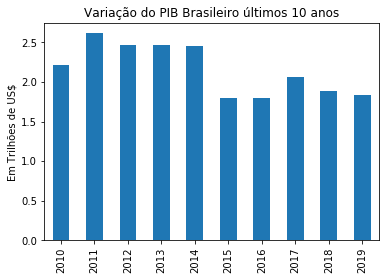

In [5]:
ax = top['Brazil'].plot.bar(title='Variação do PIB Brasileiro últimos 10 anos')
ax.set_ylabel('Em Trilhões de US$')
plt.show()

Como pode ser visto nas informações acima, o Brasil nos últimos 10 anos teve uma variação negativa do PIB. No gráfico acima mostra que a maior queda aconteceu entre 2015 e 2016 que pode ser explicada pela crise político-econômica nacional, onde conjuntos de medidas econômicas, além de certos fatores externos e determinados acontecimentos políticos internos, ocorridos durante o Governo Dilma Rousseff que, somados, resultaram em queda de atividade. No ano de 2020 é esperado mais um recessão devido à crise financeira global causada pela pandemia do Covid-19

### 3 - Qual é o abastecimento média de energia per capita?

In [6]:
energy = data_cleaning()
energy = energy['Energy Supply per Capita'].mean()
print('O abastecimento médio de energia é {} Petajoules'.format(energy))

O abastecimento médio de energia é 157.6 Petajoules


### 4 - Qual a porcentagem que os países usam de Energia Renovável?

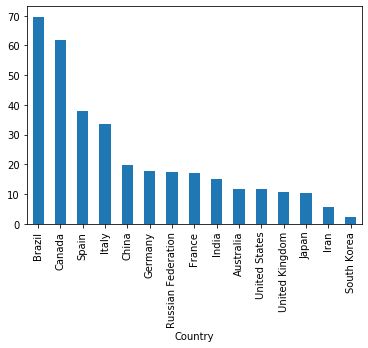

In [7]:
maximum = data_cleaning()
maximum = maximum['% Renewable']
maximum = maximum.sort_values(ascending=False)
ax = maximum.plot.bar()

Analisando o gráfico acima, vemos que o Brasil é o país que tem a maior porcentagem de utilização de energia renovável. De acordo com Agência Internacional de Energia,  o Brasil é o terceiro maior gerador de energia renovável no mundo e de acordo com a Empresa de Pesquisa Energética (EPE), o país conta com uma matriz elétrica de energia renovável predominante, “com destaque para a geração hidráulica que responde por 68,1% da oferta interna” e é uma das grandes forças brasileiras quando o assunto é energia renovável, justificando assim esse alta porcentagem. 

### 5 - Qual a estimatiza do tamanho da população utilizando Energy Supply e Energy Supply per capita?

Text(0, 0.5, 'Em bilhões de pessoas')

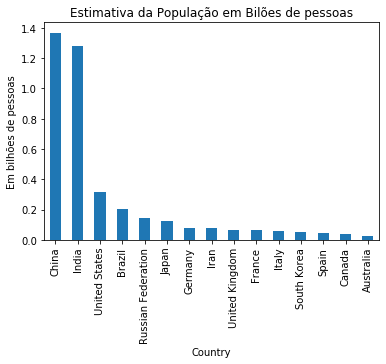

In [8]:
df = data_cleaning()
df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['Population'] = df['Population'] / 10**9
ax = df['Population'].sort_values(ascending=False).plot.bar(title='Estimativa da População em Bilões de pessoas')
ax.set_ylabel('Em bilhões de pessoas')

Como os dados não foram disponibilizados pelo tamanho da população, uma forma simples é utilizar os valores de Energy Supply e Energy Supply per capita para fazer uma estimativa. Fazendo uma pesquisa rápida na internet é fácil verificar que os valores estão bem próximos da estimativa real da população desses países

### 6 - Qual a proporção de auto-citações para o total de citações?

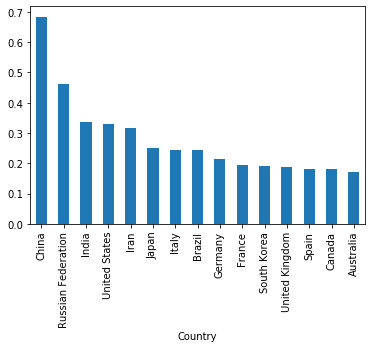

In [9]:
df = data_cleaning()
df['Ration Citation'] = df['Self-citations'] / df['Citations']
ax = df['Ration Citation'].sort_values(ascending=False).plot.bar()

Analisando agora dados mais relacionados ao SCImago Journal Rank, que é uma medida da influência científica de periódicos acadêmicos que responde pelo número de citações recebidas por um período e pela importância ou prestígio dos periódicos de onde essas situações vêm, vemos que a China é o país que tem maior proporção de auto-citações sobre artigos de Energia e Telecomunicações mostrando o quão a China está interessada nessa área nos últimos anos. 

Na América Latina esse impacto é bem visível com a recente revolução no setor de transmissão e distribuição de elétrica com a chegada dos conglomerados estatais chineses State Grid e Three Gorges nos mercados do Chile e Peru e que continuam expandindo seus negócios no Brasil.  

### 7 - Qual a correlação entre o número de documentos citáveis per capita e a oferta de enrgia per capita?

In [10]:
df = data_cleaning()
df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['Citable docs per Capita'] = df['Citable documents'] / df['Population']
corr = np.round(df['Energy Supply per Capita'].corr(df['Citable docs per Capita']), 2)
corr

0.75

Uma análise interessante que pode ser vista com os dados fornecidos é se existe uma correlação entre o números de documentos citados per capita e a oferta de energia e podemos constatar que existe uma grande relação entre essas dos aspectos. Vemos então que quanto maior o interesse de um país em estudos relacionados a Energia, maior também é o fornecimento de energia desse mesmo país.